<a href="https://colab.research.google.com/github/inhamjchoi/SafetyDataClass/blob/main/Ex06_1_Practice_3_Human_Action_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This code is based on: https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/ **

**The Dataset**

For the Practice #3 in the Lecture Note #06(1), Use 'finaldata.csv'that include acceleration signal features and labels of actions ('1' for spreading mortar, '2' for laying block, '3' for adjusting, and '4'for removing mortar)
You can also use your own dataset.



**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the Dataset**

Import the dataset and load it into our pandas dataframe,

In [ ]:
dataset = pd.read_csv("finaldata.csv")

In [ ]:
dataset.head()

,MeanX,MeanY,MeanZ,SkewX,SkewY,SkewZ,MaxX,MaxY,MaxZ,MinX,...,CorrXY,CorrYZ,CorrZX,EnergyX,EnergyY,EnergyZ,EntropyX,EntropyY,EntropyZ,action
0,-22.602273,55.329545,-5.079545,-0.430630,-0.152069,0.716635,78,127,105,-128,...,-0.006740,0.185144,0.117068,77553.723366,80642.530185,35446.530185,10.118275,3.188343,19.139626,1
1,-18.102273,58.488636,-5.340909,-0.573902,-0.193898,1.209931,75,127,105,-128,...,-0.068927,0.267239,0.278444,70430.973366,59653.646662,31609.886364,12.220491,2.672048,18.039167,1
2,-19.681818,58.375000,-11.954545,-0.664967,0.602729,0.859530,48,127,86,-127,...,0.066632,0.359750,0.262228,43265.482955,41845.589844,36148.846591,8.392115,2.077043,11.524579,1
3,-15.625000,55.693182,-10.590909,-0.328796,0.430409,0.291269,68,127,83,-128,...,-0.004686,0.201368,0.271803,51586.402344,37230.854048,33629.995739,11.412033,2.188670,13.520706,1
4,-20.125000,52.295455,-16.409091,0.238599,0.372197,-0.180156,85,127,55,-128,...,-0.045861,0.286993,0.184446,58083.558594,32247.096591,25912.370739,9.665516,2.045628,7.365125,1


**Preprocessing**

The next step is to split our dataset into its attributes and labels.

The X variable contains the first 30 columns of the dataset (i.e. signal features) while y contains the labels of actions.

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4]


**Feature Scaling**

Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Wikipedia explains the reasoning pretty well:

*Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.*

The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features.



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.40555157  0.67325072 -0.62871115 ...  0.63644871  0.99717789
   1.37767142]
 [ 0.80426761  0.97088662 -0.64433876 ...  1.05221904  0.39671295
   1.21193772]
 [ 0.66431425  0.96018029 -1.03978516 ...  0.29505357 -0.29529342
   0.23081354]
 ...
 [ 4.80653093  0.7674664   1.27174173 ... -0.29964038 -0.03266154
  -0.93067282]
 [ 4.41586976  1.02334763  1.02441786 ...  0.52858586 -0.23926989
  -0.71428942]
 [ 3.73019898  0.69145147  1.29280502 ...  0.01325997 -0.33001923
  -0.91116578]]


**Training and Cross Validation**

The first step in the training and cross validation phase is simple.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)


Next, to implement cross validation, the *cross_val_score* method of the *sklearn.model_selection* library can be used. The *cross_val_score* returns the accuracy for all the folds. The first parameter is estimator which basically specifies the algorithm that you want to use for cross validation. The second and third parameters, X and y, i.e. features and labels. Finally the number of folds is passed to the cv parameter as shown in the following code:

In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X, y=y, cv=5)

In [ ]:
print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())

[0.91935484 1.         0.9516129  0.8852459  0.8852459 ]
0.9282919090428345
0.04352403430590002


**(Optional) Grid Search for Parameter Selection**

A machine learning model has two types of parameters. The first type of parameters are the parameters that are learned through a machine learning model while the second type of parameters are the hyper parameter that we pass to the machine learning model.

In the last section, we used the Random Forest algorithm. The number of estimators we used for the algorithm was 300. Similarly in KNN algorithm we have to specify the value of K and for SVM algorithm we have to specify the type of Kernel. These estimators - the K value and Kernel - are all types of hyper parameters.

Normally we randomly set the value for these hyper parameters and see what parameters result in best performance. However randomly selecting the parameters for the algorithm can be exhaustive.

Also, it is not easy to compare performance of different algorithms by randomly setting the hyper parameters because one algorithm may perform better than the other with different set of parameters. And if the parameters are changed, the algorithm may perform worse than the other algorithms.

Therefore, instead of randomly selecting the values of the parameters, a better approach would be to develop an algorithm which automatically finds the best parameters for a particular model. Grid Search is one such algorithm.

To implement the Grid Search algorithm we need to import GridSearchCV class from the sklearn.model_selection library.
The first step you need to perform is to create a dictionary of all the parameters and their corresponding set of values that you want to test for best performance. The name of the dictionary items corresponds to the parameter name and the value corresponds to the list of values for the parameter.
Let's create a dictionary of parameters and their corresponding values for our Random Forest algorithm. Details of all the parameters for the random forest algorithm are available in the Scikit-Learn docs.

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

Take a careful look at the above code. Here we create grid_param dictionary with three parameters n_estimators, criterion, and bootstrap. The parameter values that we want to try out are passed in the list. For instance, in the above script we want to find which value (out of 100, 300, 500, 800, and 1000) provides the highest accuracy.

Similarly, we want to find which value results in the highest performance for the criterion parameter: "gini" or "entropy"? The Grid Search algorithm basically tries all possible combinations of parameter values and returns the combination with the highest accuracy. For instance, in the above case the algorithm will check 20 combinations (5 x 2 x 2 = 20).

The Grid Search algorithm can be very slow, owing to the potentially huge number of combinations to test. Furthermore, cross validation further increases the execution time and complexity.

Once the parameter dictionary is created, the next step is to create an instance of the GridSearchCV class. You need to pass values for the estimator parameter, which basically is the algorithm that you want to execute. The param_grid parameter takes the parameter dictionary that we just created as parameter, the scoring parameter takes the performance metrics, the cv parameter corresponds to number of folds, which is 5 in our case, and finally the n_jobs parameter refers to the number of CPU's that you want to use for execution. A value of -1 for n_jobs parameter means that use all available computing power. This can be handy if you have large number amount of data.

In [ ]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)



Once the GridSearchCV class is initialized, the last step is to call the fit method of the class and pass it the training  set



In [ ]:
gd_sr.fit(X, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=300, random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='accuracy')

Once the method completes execution, the next step is to check the parameters that return the highest accuracy. To do so, print the sr.best_params_ attribute of the GridSearchCV object.

In [ ]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}


The last and final step of Grid Search algorithm is to find the accuracy obtained using the best parameters.

In [ ]:
best_result = gd_sr.best_score_
print(best_result)

0.9479111581173981


Try to use AutoML!



#SHAP Analysis

In [ ]:
# [15] Retrain the model using the best parameters from Grid Search
best_classifier = RandomForestClassifier(
    n_estimators=best_parameters['n_estimators'],
    criterion=best_parameters['criterion'],
    bootstrap=best_parameters['bootstrap'],
    random_state=0
)

best_classifier.fit(X, y)
print("Model retrained with best parameters:", best_parameters)

# [16] Evaluate the model performance using cross-validation again
from sklearn.model_selection import cross_val_score
best_cv_scores = cross_val_score(estimator=best_classifier, X=X, y=y, cv=5)
print("Cross-validation accuracies:", best_cv_scores)
print("Mean Accuracy:", best_cv_scores.mean())
print("Standard Deviation:", best_cv_scores.std())


Model retrained with best parameters: {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 100}
Cross-validation accuracies: [0.9516129  0.98387097 0.9516129  0.90163934 0.95081967]
Mean Accuracy: 0.9479111581173981
Standard Deviation: 0.02634408454715291



=== Feature Importance for Class 1: Spreading Mortar ===


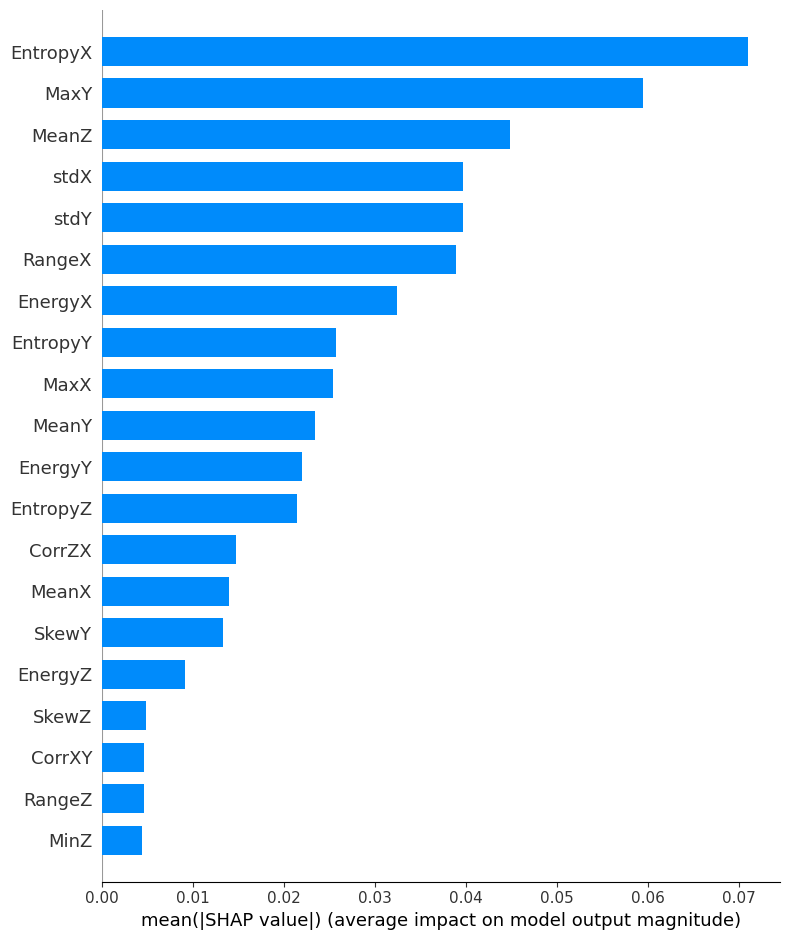

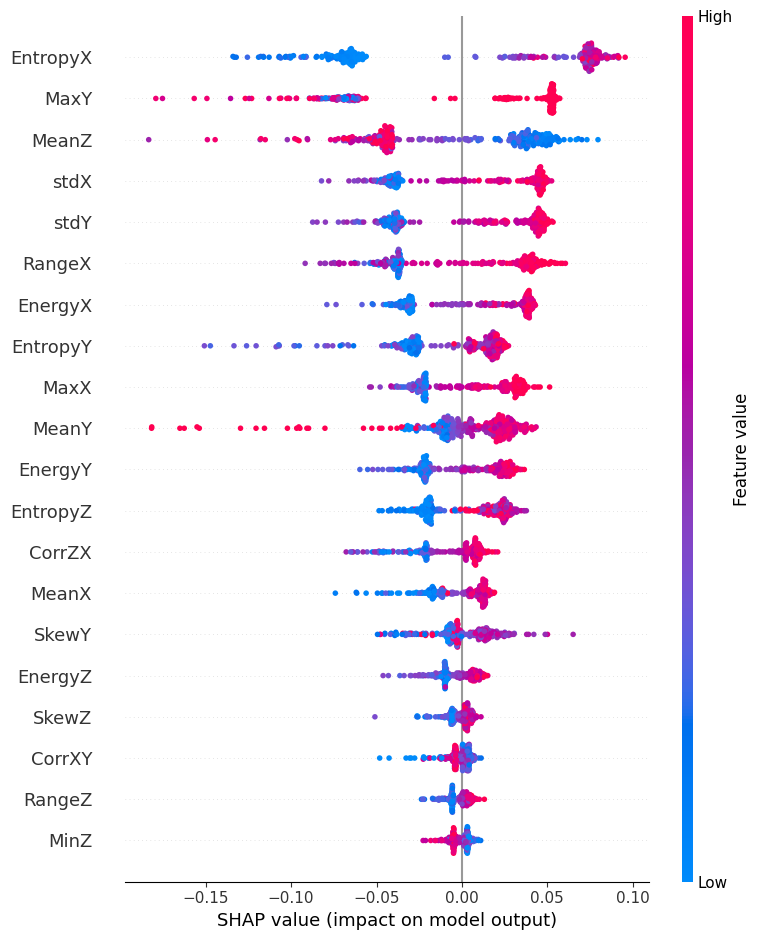


=== Feature Importance for Class 2: Laying Block ===


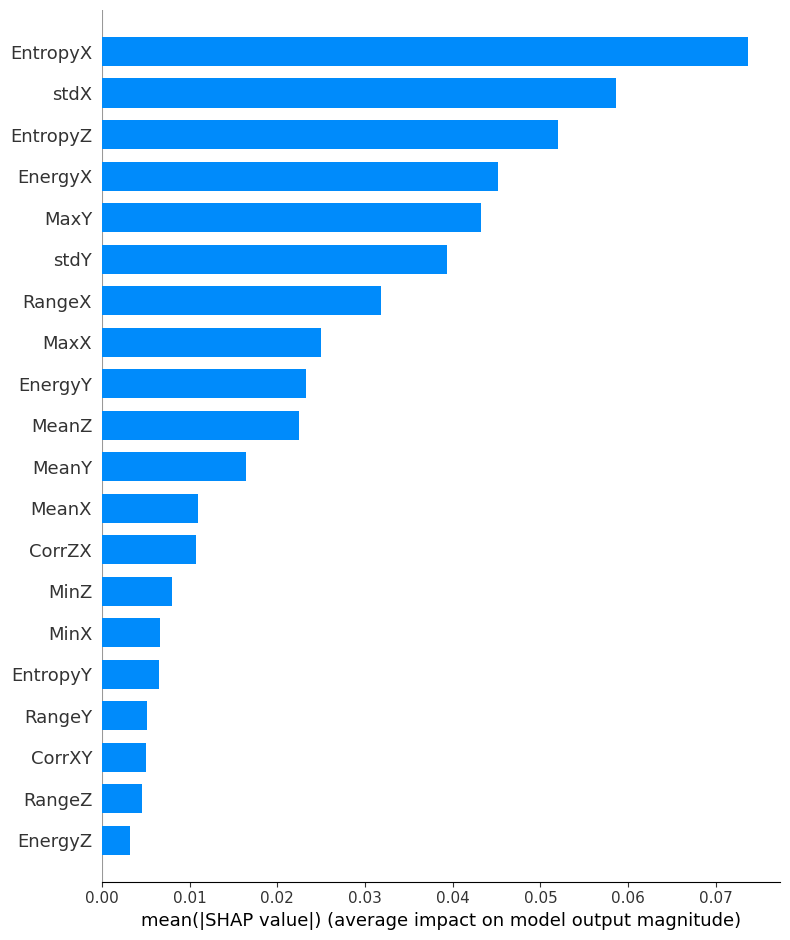

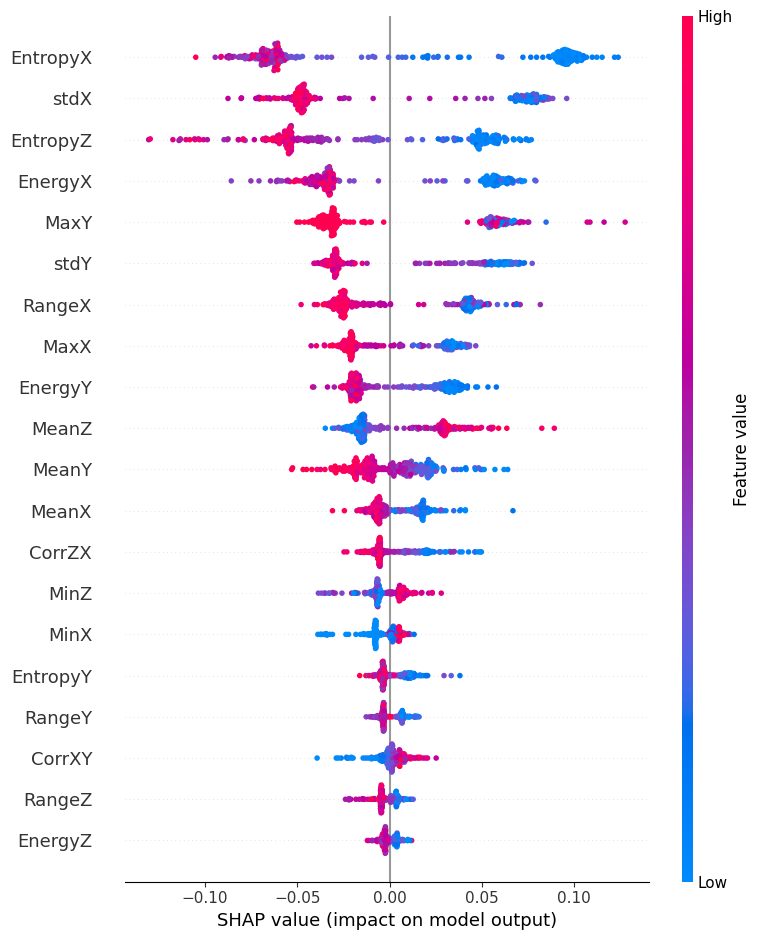


=== Feature Importance for Class 3: Adjusting ===


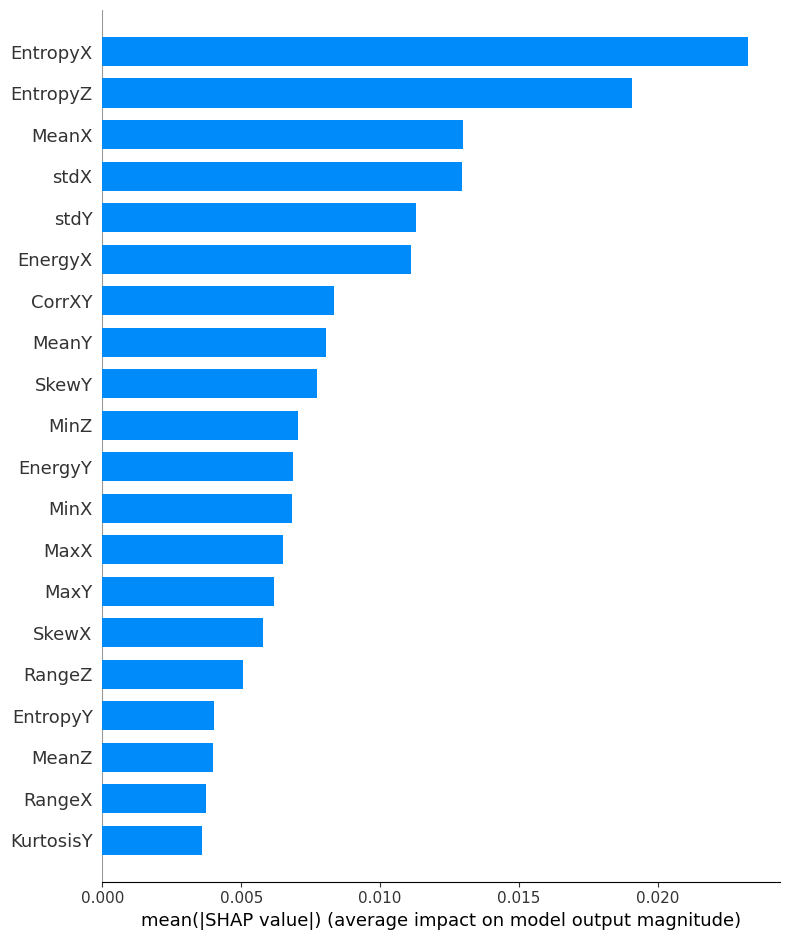

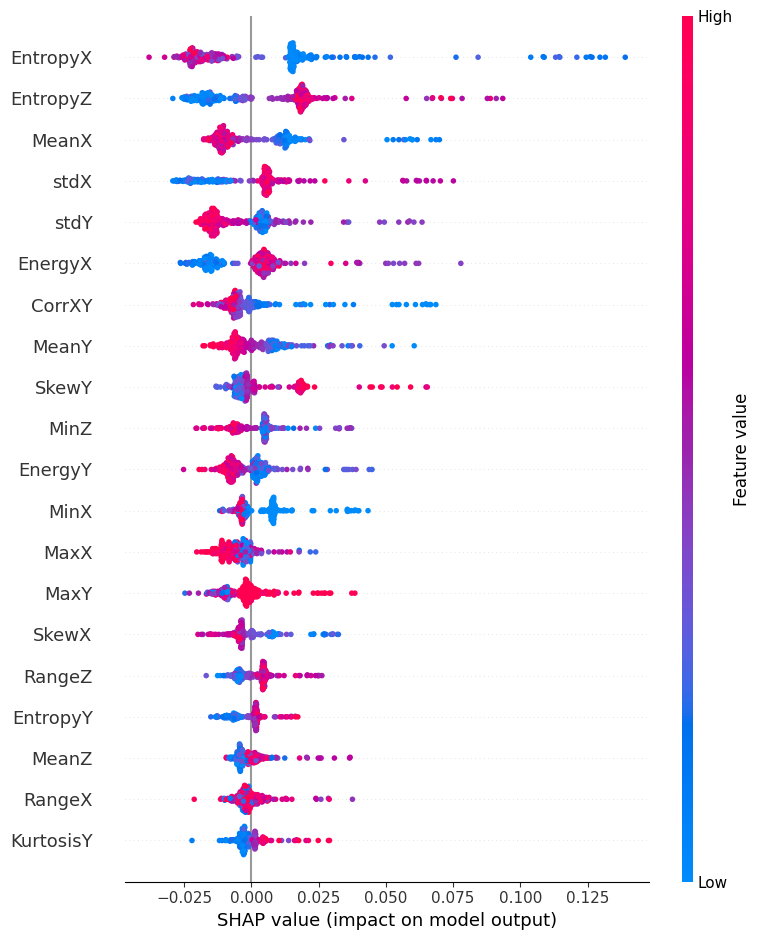


=== Feature Importance for Class 4: Removing Mortar ===


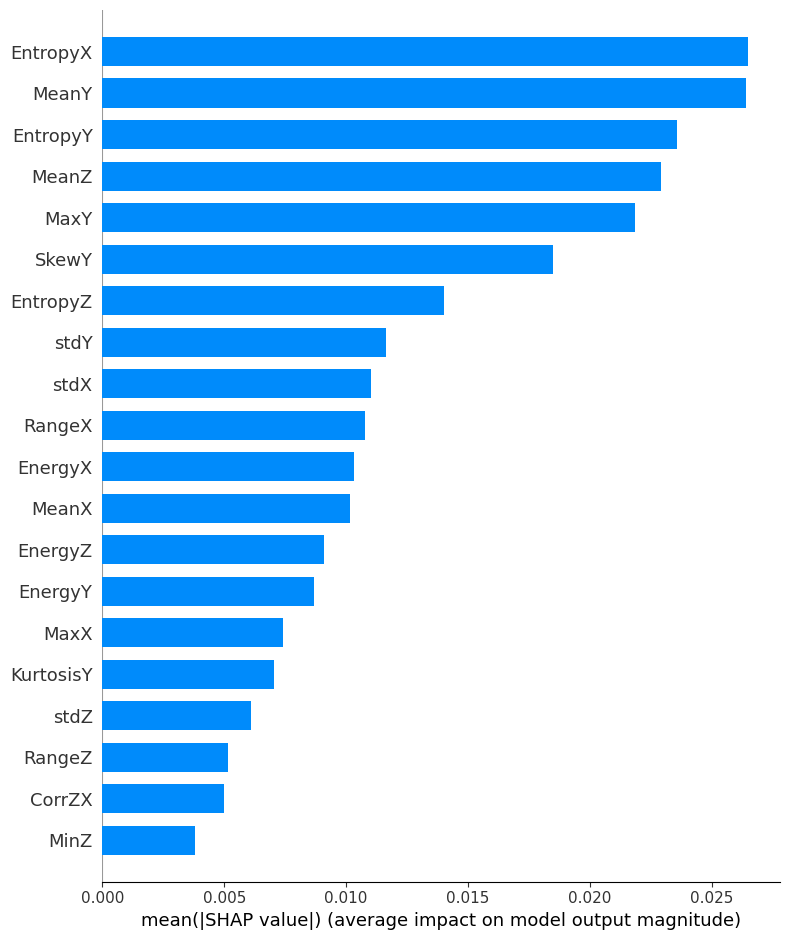

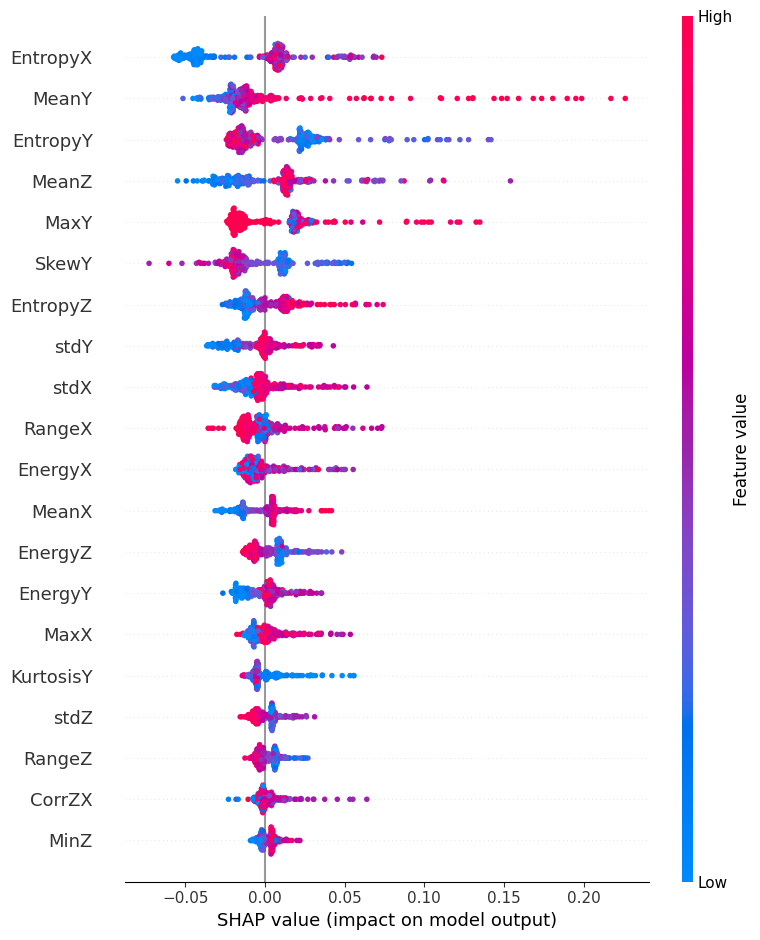

In [ ]:
# X를 DataFrame으로 변환 (feature 이름 일치)
X_df = pd.DataFrame(X, columns=dataset.columns[:-1])

# SHAP 계산
explainer = shap.TreeExplainer(best_classifier)
shap_values = explainer.shap_values(X_df)

# 형태 자동 처리 (리스트 또는 3D array 구분)
if isinstance(shap_values, list):
    shap_values_list = shap_values
else:
    shap_values_list = [shap_values[:, :, i] for i in range(shap_values.shape[2])]

# 클래스 이름 매핑
class_labels = {
    1: "Spreading Mortar",
    2: "Laying Block",
    3: "Adjusting",
    4: "Removing Mortar"
}

# 클래스별 개별 플롯 출력
for i, (class_num, class_name) in enumerate(class_labels.items()):
    print(f"\n=== Feature Importance for Class {class_num}: {class_name} ===")

    # (1) Bar plot – 평균 중요도 기준 순위
    shap.summary_plot(
        shap_values_list[i],
        X_df,
        feature_names=X_df.columns,
        plot_type="bar",
        show=True
    )

    # (2) Beeswarm plot – feature별 예측 영향 시각화
    shap.summary_plot(
        shap_values_list[i],
        X_df,
        feature_names=X_df.columns,
        show=True
    )